# Tutorial 4




# 1. Convolutional Nets - Output Shapes
In this exericse we will analyse the output shapes of convolutional layers using padding and strides. First let us consider the output shape of a simple convolution kernel.



Assuming that the input shape is $n_h\times n_w$ and the convolution kernel shape is $k_h\times k_w$, then the output shape will be


$$(n_h-k_h+1) \times (n_w-k_w+1).$$


Therefore, the output shape of the convolutional layer
is determined by the shape of the input
and the shape of the convolution kernel.

Let us consider the simple example from the lecture:

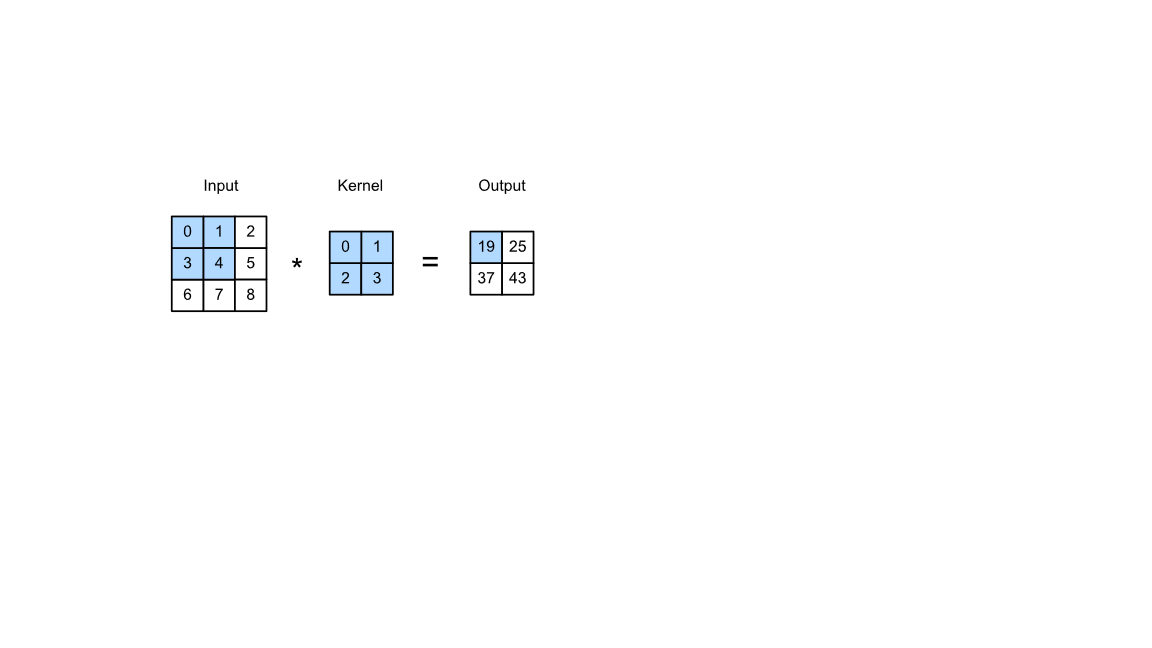

**Exercise:** What is the output shape? Plug in the values of $n_h$, $n_w$, $k_h$ and $k_w$ and check if the equation holds.

Lösung:

$$
\text{outputshape} = (3-2+1) \times (3-2+1) = 2 \times 2
$$

## Padding



In general, if we add a total of $p_h$ rows of padding
(roughly half on top and half on bottom)
and a total of $p_w$ columns of padding
(roughly half on the left and half on the right),
the output shape will be

$$(n_h-k_h+p_h+1)\times(n_w-k_w+p_w+1).$$

This means that the height and width of the output
will increase by $p_h$ and $p_w$, respectively.

**Exercise:** Try to understand this formula.

**Example:** Using padding, we typically set the values of the extra pixels to zero.
In the following example, we pad a $3 \times 3$ input that
increases its size to $5 \times 5$:



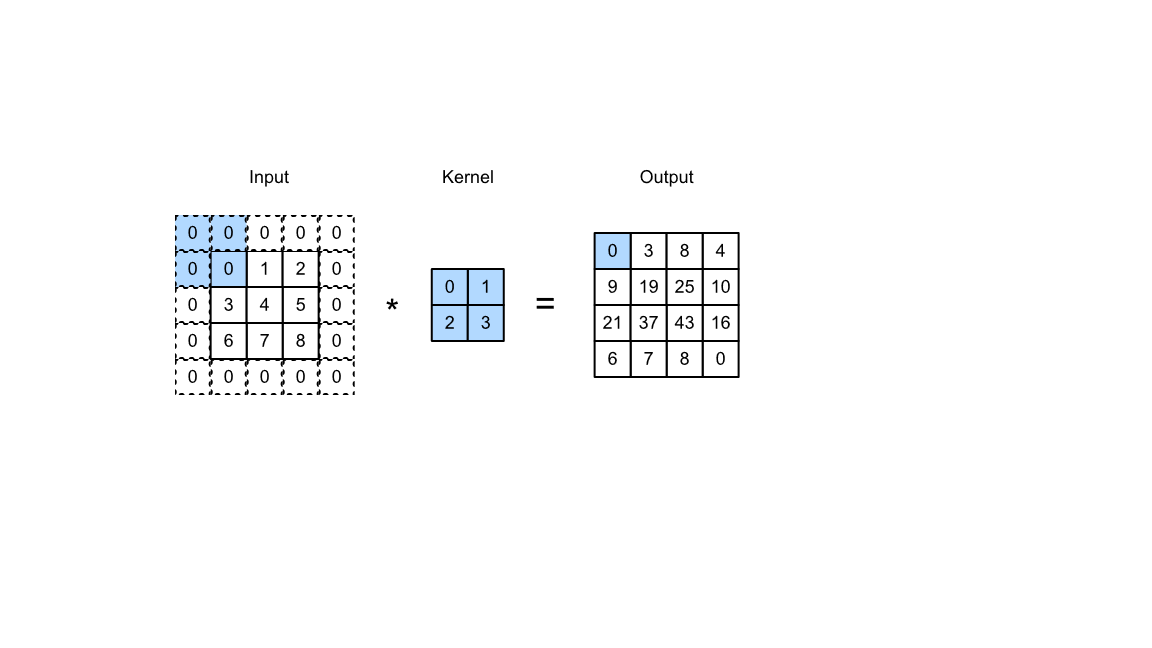

What is the corresponding output shape? Does the formula holds?

Lösung:

$$
\text{outputshape} = (3-2+2+1) \times (3-2+2+1) = 4 \times 4
$$

In the next example, we create a two-dimensional convolutional layer (kernel)
with a height and width of 3 and apply 1 pixel of padding on all sides ([documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)).

In [ ]:
import torch
from torch import nn

In [ ]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)

Given an input with a height and width of 8, we find that the height and width of the output is also 8. Try to understand why we get this output shape! What is $p_h$? What is $p_w$?

$$
\text{outputshape} = (8-3+2+1) \times (8-3+2+1) = 8 \times 8
$$

In [ ]:
X = torch.rand(size=(8, 8))
X.shape

torch.Size([8, 8])

In [ ]:
a = X.reshape((1, 1) + X.shape)

In [ ]:
a.shape

torch.Size([1, 1, 8, 8])

In [ ]:
def comp_conv2d(conv2d, X):
    # Here (1, 1) indicates that the batch size and the number of channels
    # are both 1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # Exclude the first two dimensions that do not interest us: examples and
    # channels
    return Y.reshape(Y.shape[2:])

X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In many cases, we set $p_h=k_h−1$ and $p_w=k_w−1$ to give the input and output the same height and width. This will make it easier to predict the output shape of each layer when constructing the network.

**Exercise:** CNNs commonly use convolution kernels with odd height and width values, such as 1, 3, 5, or 7. What is the reason?

Choosing odd kernel sizes has the benefit that we can preserve the spatial dimensionality while padding with the same number of rows on top and bottom, and the same number of columns on left and right.

## Strides

In general, when the stride for the height is $s_h$
and the stride for the width is $s_w$, the output shape is


$$\lfloor(n_h-k_h+p_h+s_h)/s_h\rfloor \times \lfloor(n_w-k_w+p_w+s_w)/s_w\rfloor.$$

**Exercise:** Try to understand this formula.

If we set $p_h=k_h-1$ and $p_w=k_w-1$,
then the output shape will be simplified to
$\lfloor(n_h+s_h-1)/s_h\rfloor \times \lfloor(n_w+s_w-1)/s_w\rfloor$.

Going a step further, if the input height and width
are divisible by the strides on the height and width,
then the output shape will be $(n_h/s_h) \times (n_w/s_w)$. **Why?**


 **Example:** In the following example we are using strides of 3 and 2 for height and width, respectively.

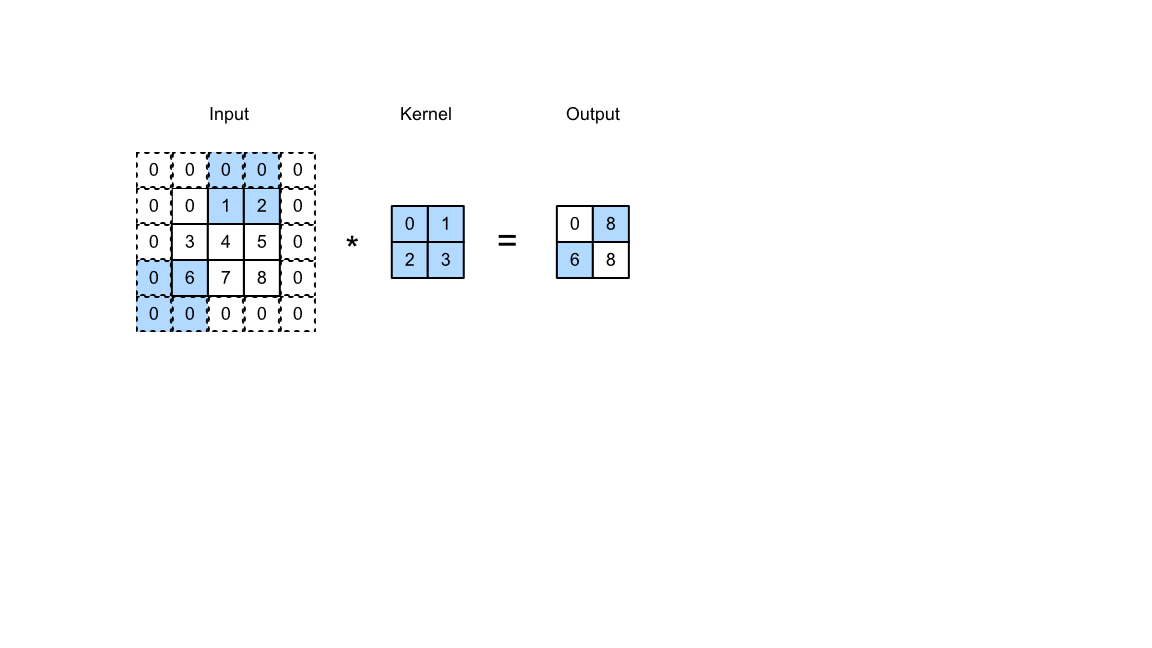



Is the output shape consistent with the formula?

$$
\text{outputshape} = (3-2+2+3)/3 \times (3-2+2+2)/2 = 6/3 \times 5/2 = 2 \times 2.5 = 2 \times 2
$$

**Further Experiments:** Below, we set the strides on both the height and width to 2,
thus halving the input height and width starting again with a 8x8 input X.

In [ ]:
X.shape

torch.Size([8, 8])

In [ ]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

Next, we will look at a slightly more complicated example.

In [ ]:
conv2d = nn.Conv2d(1, 1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])


In each of these experiments, use mathematics to calculate the output shape to see if it is consistent with the printed shapes.

**Exercise:**
Try other padding and stride combinations on the experiments.

## 2. Convolutional Nets for the MNIST dataset

## Performance of the Feedforward Neural Network from Tutorial 3



As in the previous tutorial, we first load the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Just to remind you, the dataset contains $70,000$ observations of handwritten digits with corresponding labels.

In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets

In [ ]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True,   transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
mnist_test = datasets.MNIST(root='./data', train=False, download=True,   transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])) #normalize on the training dataset

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 445kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.09MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.26MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Again, we are constructing a `DataLoader` for the training set by using `torch.utils.data.DataLoader` and set a seed for the random number generator. Additionally, create an `DataLoader` for the test set.

In [ ]:
torch.manual_seed(42)

BATCH_SIZE = 64


# data loader
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = BATCH_SIZE, shuffle = False)



In [ ]:
example_features, example_labels = next(iter(train_loader))
example_features.shape, example_labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [ ]:
example_labels

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])

The following code chunk displays the features as an imange and the corresponding labels.

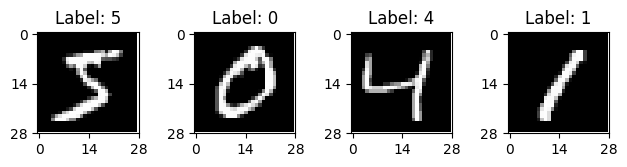

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.tight_layout()
    plt.imshow(example_features[i][0], cmap='gray', interpolation='none')
    plt.title("Label: {}".format(example_labels[i]))
    plt.xticks([0,14,28])
    plt.yticks([0,14,28])
plt.show()

We constructed the following sequential neural network for classification of MNIST images:

In [ ]:
from torch import nn
nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 100),
                    nn.ReLU(),
                    nn.Linear(100, 50),
                    nn.ReLU(),
                    nn.Linear(50, 10))

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=50, bias=True)
  (4): ReLU()
  (5): Linear(in_features=50, out_features=10, bias=True)
)

We achieved a accuracy of up to **45%** on the test sample. We know that Convolutional Networks are the better choice to classify images using the spatial structure of the data. Let us see if we can improve the performance of our classifier.




In [ ]:
from torch import nn

class Reshape(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 3*3*64)

cnn_1 = nn.Sequential(nn.Conv2d(1, 32, kernel_size=5),
                    nn.ReLU(),
                    nn.Conv2d(32, 32, kernel_size=5),
                    nn.MaxPool2d(kernel_size=2),
                    nn.ReLU(),
                    nn.Dropout(0.5),
                    nn.Conv2d(32,64, kernel_size=5),
                    nn.MaxPool2d(kernel_size=2),
                    nn.ReLU(),
                    nn.Dropout(0.5),
                    Reshape(),
                    nn.Linear(3*3*64, 256),
                    nn.Dropout(0.5),
                    nn.Linear(256, 10),
                    nn.LogSoftmax()
                    )


In [ ]:
cnn_1

Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Reshape()
  (11): Linear(in_features=576, out_features=256, bias=True)
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=256, out_features=10, bias=True)
  (14): LogSoftmax(dim=None)
)

In most code one des not use nn.Sequential.

In [ ]:
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

cnn_2 = CNN()
print(cnn_2)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


Generally, the weigths are initialized uniformly.

Use GPUs for training your model.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
cnn = cnn_1
cnn.to(device)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Reshape()
  (11): Linear(in_features=576, out_features=256, bias=True)
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=256, out_features=10, bias=True)
  (14): LogSoftmax(dim=None)
)

In [ ]:
loss = nn.CrossEntropyLoss()
trainer = torch.optim.Adam(cnn.parameters())

In [ ]:
num_epochs = 2
log_interval = 50

train_losses = []
test_losses = []

torch.manual_seed(45) #set a seed for replicability

In [ ]:
#evaluate test loss
test_loss = 0
with torch.no_grad():
    for data in test_loader:
        X,Y = data[0].to(device),data[1].to(device)
        test_loss += loss(cnn(X) ,Y)
test_losses.append(test_loss.to("cpu")/len(mnist_test))

print(test_loss)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor(363.7840)


In [ ]:
for epoch in range(num_epochs):
    #train the network
    cnn.train()
    for batch_idx, data in enumerate(train_loader):
        X,Y = data[0].to(device),data[1].to(device)
        training_loss = loss(cnn(X) ,Y)/len(X)
        trainer.zero_grad() #reset the gradient to zero
        training_loss.backward()
        trainer.step()
        if batch_idx % log_interval == 0:
            print('Training: Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1, batch_idx * len(X), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), training_loss))
            train_losses.append(training_loss.to("cpu").detach())
    #evaluate the test set
    cnn.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data in test_loader:
            X,Y = data[0].to(device),data[1].to(device)
            prediction = cnn(X)
            test_loss += loss(prediction, Y)
            max_prediction = prediction.data.max(1,keepdim=True)[1]
            correct += max_prediction.eq(Y.data.reshape(-1,1)).sum()
        test_loss /= len(test_loader.dataset)
        print('\nTest Sample: Risk/Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),
                                                                              100. * correct / len(test_loader.dataset)))
        test_losses.append(test_loss.to("cpu"))


Training: Epoch: 1 [0/60000 (0%)]	Loss: 0.036417
Training: Epoch: 1 [3200/60000 (5%)]	Loss: 0.008795
Training: Epoch: 1 [6400/60000 (11%)]	Loss: 0.003787
Training: Epoch: 1 [9600/60000 (16%)]	Loss: 0.005580
Training: Epoch: 1 [12800/60000 (21%)]	Loss: 0.003280
Training: Epoch: 1 [16000/60000 (27%)]	Loss: 0.005845
Training: Epoch: 1 [19200/60000 (32%)]	Loss: 0.003844
Training: Epoch: 1 [22400/60000 (37%)]	Loss: 0.001864
Training: Epoch: 1 [25600/60000 (43%)]	Loss: 0.001911
Training: Epoch: 1 [28800/60000 (48%)]	Loss: 0.002415
Training: Epoch: 1 [32000/60000 (53%)]	Loss: 0.003081
Training: Epoch: 1 [35200/60000 (59%)]	Loss: 0.003756
Training: Epoch: 1 [38400/60000 (64%)]	Loss: 0.001098
Training: Epoch: 1 [41600/60000 (69%)]	Loss: 0.001895
Training: Epoch: 1 [44800/60000 (75%)]	Loss: 0.002301
Training: Epoch: 1 [48000/60000 (80%)]	Loss: 0.001330
Training: Epoch: 1 [51200/60000 (85%)]	Loss: 0.002416
Training: Epoch: 1 [54400/60000 (91%)]	Loss: 0.000878
Training: Epoch: 1 [57600/60000 (96%)

Interpret the output! Can we improve the performance of our network on the testing sample by using a Convolutional Net?

# 3. CIFAR


As in the lecture, we consider the data set CIFAR-10 that consists of 60,000 tiny color images. Remark that these images consist of three channels: red, green, and blue. Hence, the images in CIFAR-10 are of size 3x32x32.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:12<00:00, 13.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


We already know the data from the lecture. But let us have a look at some examples

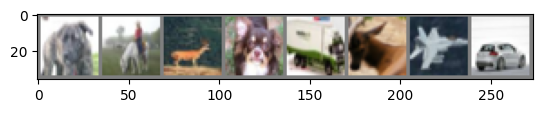

  dog horse  deer   dog


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
images[0].shape

torch.Size([3, 32, 32])

Contrary to the lecture, we do not only focus on dogs and cats in this tutorial. We ain to build a classifier for all categories:


In [ ]:
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Instead of building a fully-connected network that tends to overfitting, let us consider the following Convolutional Net:

In [ ]:
class Reshape(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 32 * 5 * 5)

net_1 = nn.Sequential(nn.Conv2d(3, 16, kernel_size=5),
                    nn.ReLU(),
                    nn.MaxPool2d(2, 2),
                    nn.Conv2d(16, 32, kernel_size=5),
                    nn.ReLU(),
                    nn.MaxPool2d(2, 2),
                    Reshape(),
                    nn.Linear(32 * 5 * 5, 120),
                    nn.Linear(120, 84),
                    nn.Linear(84, 10))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_2 = Net()

Discribe the structure of the network. How many convolutional layers are used? Are we using padding and strides?

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net = net_1
net.to(device)
print(net)

cuda:0
Sequential(
  (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Reshape()
  (7): Linear(in_features=800, out_features=120, bias=True)
  (8): Linear(in_features=120, out_features=84, bias=True)
  (9): Linear(in_features=84, out_features=10, bias=True)
)


Let us training the network:

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
n_epochs = 5

for epoch in range(n_epochs):  # loop over the dataset multiple times
    net.train
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.997
[1,  4000] loss: 1.598
[1,  6000] loss: 1.437
[2,  2000] loss: 1.325
[2,  4000] loss: 1.252
[2,  6000] loss: 1.211
[3,  2000] loss: 1.147
[3,  4000] loss: 1.103
[3,  6000] loss: 1.086
[4,  2000] loss: 1.034
[4,  4000] loss: 1.023
[4,  6000] loss: 1.025
[5,  2000] loss: 0.955
[5,  4000] loss: 0.963
[5,  6000] loss: 0.969
Finished Training


Let us display some images from the test set to get familiar with the performance of our network.

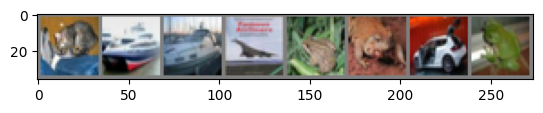

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [ ]:
net.eval
outputs = net(images.to(device))

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

Predicted:    cat  ship  ship plane  frog  frog   car  frog


Now, let us calculated the accuracy over all oberservations in the test sample!

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device)).to("cpu")
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 66 %


Interpret the accuracy! Is it better than our fully-connected network from the lecture? Remember that we achieved a accuracy of 60% for classifying only cats and dogs that was just slighty better than random guessing.


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device)).to("cpu")
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 77 %
Accuracy of   car : 78 %
Accuracy of  bird : 53 %
Accuracy of   cat : 50 %
Accuracy of  deer : 56 %
Accuracy of   dog : 46 %
Accuracy of  frog : 81 %
Accuracy of horse : 68 %
Accuracy of  ship : 77 %
Accuracy of truck : 67 %


Just a reminder how to save and load models.

In [ ]:
torch.save(net.state_dict(),'cifar_net.pth')

In [ ]:

net.load_state_dict(torch.load('cifar_net.pth'))

<ipython-input-39-fd11c6ab1437>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('cifar_net.pth'))


<All keys matched successfully>